# Performance Metrics

* **Evaluate the performance of your model with the metrics you have learned in this course.**
* **Plot the ROC and the precision / recall curves for different "c" values.**

In [62]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report, precision_recall_fscore_support,roc_curve, roc_auc_score

In [28]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
del titanic["Cabin"]

In [30]:
titanic.dropna(inplace= True)

In [31]:
gender_df = pd.get_dummies(titanic.Sex)
titanic["is_female"] = gender_df.female
titanic["is_male"] = gender_df.male

In [32]:
def mix(df):
    result = df.copy()
    for i in range(len(df.columns)):
        for j in df.columns[i:]:
            col1 = df.columns[i]
            df[col1]
            dummy = df[col1] * df[j]
            result[col1 + "_" + j] = dummy
    return result

In [33]:
X = titanic[["Pclass","SibSp","Age","Parch","is_male","is_female","Fare"]]
X_mix = mix(X)
Y = titanic["Survived"]

In [34]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [36]:
model_one = LogisticRegression()
model_one.fit(X_train,y_train)

LogisticRegression()

In [38]:
model_softmax = LogisticRegression(multi_class = "multinomial")
model_softmax.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [39]:
print("One vs Rest \n -------------\n Train accuracy : {} \n Test accuracy : {} \n ".format(model_one.score(X_train,y_train),model_one.score(X_test,y_test)))
print("Softmax \n -------------\n Train accuracy : {} \n Test accuracy : {} \n ".format(model_softmax.score(X_train,y_train),model_softmax.score(X_test,y_test)))

One vs Rest 
 -------------
 Train accuracy : 0.8155136268343816 
 Test accuracy : 0.7914893617021277 
 
Softmax 
 -------------
 Train accuracy : 0.8218029350104822 
 Test accuracy : 0.7659574468085106 
 


In [40]:
train_one_pred = model_one.predict(X_train)
test_one_pred = model_one.predict(X_test)

In [41]:
train_softmax_pred = model_softmax.predict(X_train)
test_softmax_pred = model_softmax.predict(X_test)

In [43]:
train_one_pred_prob = model_one.predict_proba(X_train)
test_one_pred_prob = model_one.predict_proba(X_test)

In [44]:
train_softmax_pred_prob = model_softmax.predict_proba(X_train)
test_softmax_pred_prob = model_softmax.predict_proba(X_test)

In [46]:
train_one_conf = confusion_matrix(y_train,train_one_pred)
test_one_conf = confusion_matrix(y_test,test_one_pred)

In [47]:
train_softmax_conf = confusion_matrix(y_train,train_softmax_pred)
test_softmax_conf = confusion_matrix(y_test,test_softmax_pred)

In [48]:
print("One vs Rest :\n --------------- \n Train Confusion Matrix : \n {} \n Test Confusion Matrix : \n {} \n".format(train_one_conf,test_one_conf))
print("Softmax :\n --------------- \n Train Confusion Matrix : \n {} \n Test Confusion Matrix : \n {} \n".format(train_softmax_conf,test_softmax_conf))

One vs Rest :
 --------------- 
 Train Confusion Matrix : 
 [[249  39]
 [ 49 140]] 
 Test Confusion Matrix : 
 [[116  20]
 [ 29  70]] 

Softmax :
 --------------- 
 Train Confusion Matrix : 
 [[249  39]
 [ 46 143]] 
 Test Confusion Matrix : 
 [[112  24]
 [ 31  68]] 



In [77]:
def metrics(model,X_test,X_train, y_train,y_test, y_train_preds,y_test_preds, type_of_logreg):
    test_prediction = model.predict(X_test)
    #Confusion Matrix
    train_conf = confusion_matrix(y_train,y_train_preds)
    test_conf = confusion_matrix(y_test,y_test_preds)
    print("{}:\n --------------- \n Train Confusion Matrix : \n {} \n Test Confusion Matrix : \n {} \n".format(type_of_logreg,train_one_conf,test_one_conf))
    
    #Accuracy Score
    TN = test_conf[0][0]
    FP = test_conf[0][1]
    FN = test_conf[1][0]
    TP = test_conf[1][1]
    print("{} : \n ----------------------------".format(type_of_logreg))
    print("Accuracy value by the model   : {:.2f}".format(model.score(X_test, y_test)))
    print("Calculated accuracy value     : {:.2f}".format(((TN + TP)/(FN + FP + TN + TP))))
    print("accuracy_score() value        : {:.2f} \n".format(accuracy_score(y_test, test_prediction)))
    
    #Presicion Score
    print("Calculated precision value   : {:.2f}".format(((TP)/(FP + TP))))
    print("precision_score() value      : {:.2f}\n".format(precision_score(y_test, test_prediction)))
    
    
    #Recall Score
    print("Calculated recall value   : {:.2f}".format(((TP)/(TP + FN))))
    print("recall_score() value      : {:.2f}\n".format(recall_score(y_test, test_prediction)))
    
    #Specificity
    print("Calculated specificity value   : {:.2f}\n".format(((TN)/(TN + FP))))
    
    #F1 Score
    precision = precision_score(y_test, test_prediction)
    recall = recall_score(y_test, test_prediction)


    print("Calculated F1 score  : {:.2f}".format(2*((recall*precision)/(recall + precision))))
    print("f1_score() value     : {:.2f} \n".format(f1_score(y_test, test_prediction)))
    
    # Classification Report
    
    print(classification_report(y_test, test_prediction))

    print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
    print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
    print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
    print('\n')

    metrics = precision_recall_fscore_support(y_test, test_prediction)
    print("Precision  :" , metrics[0]) 
    print("Recall     :" , metrics[1]) 
    print("F1 Score   :" , metrics[2])
    
    # ROC Curve (ROC / AUC)
    C_values = [0.001,0.01, 0.1,1,10,100, 1000]
    
    for c in C_values:
        if type_of_logreg == "One vs Rest":
            model_1 = LogisticRegression(C = c)
            model_1.fit(X_train,y_train)
        elif type_of_logreg == "Softmax":
            model_1 = LogisticRegression(C = c, multi_class="multinomial")
            model_1.fit(X_train,y_train)
            
        test_prediction_proba = model_1.predict_proba(X_test)[:,1]
    
        fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)
    
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr)

        plt.xlabel('False Positive Ratio')
        plt.ylabel('True Positive Ratio')
        plt.title('ROC Curve with c value :{}'.format(c))

        plt.show()
        print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

One vs Rest:
 --------------- 
 Train Confusion Matrix : 
 [[249  39]
 [ 49 140]] 
 Test Confusion Matrix : 
 [[116  20]
 [ 29  70]] 

One vs Rest : 
 ----------------------------
Accuracy value by the model   : 0.79
Calculated accuracy value     : 0.79
accuracy_score() value        : 0.79 

Calculated precision value   : 0.78
precision_score() value      : 0.78

Calculated recall value   : 0.71
recall_score() value      : 0.71

Calculated specificity value   : 0.85

Calculated F1 score  : 0.74
f1_score() value     : 0.74 

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       136
           1       0.78      0.71      0.74        99

    accuracy                           0.79       235
   macro avg       0.79      0.78      0.78       235
weighted avg       0.79      0.79      0.79       235

f1_score() value        : 0.74
recall_score() value    : 0.71
precision_score() value : 0.78


Precision  : [0.8        0.77777778]
Recall     

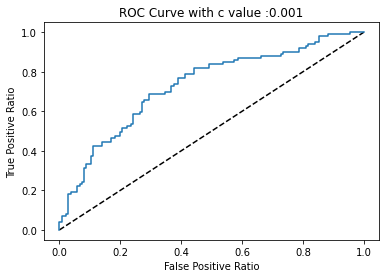

AUC value :  0.7288324420677361


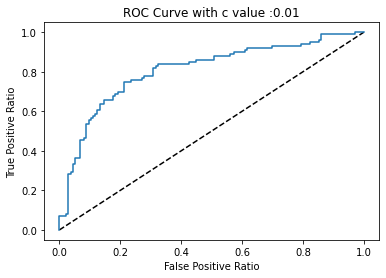

AUC value :  0.8064468211527035


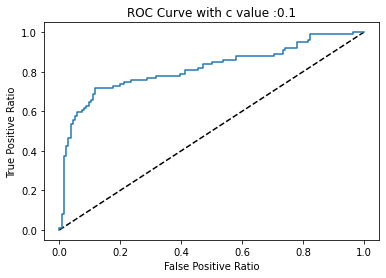

AUC value :  0.8157308377896614


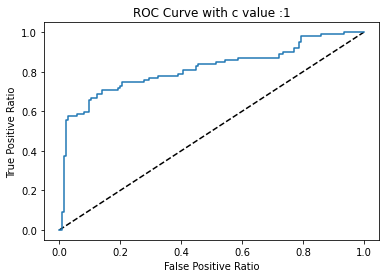

AUC value :  0.8137997623291741


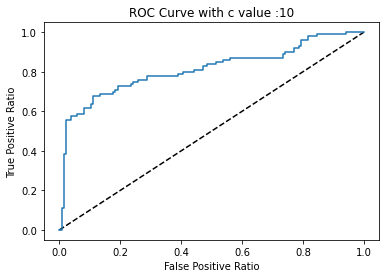

AUC value :  0.8113487819370173


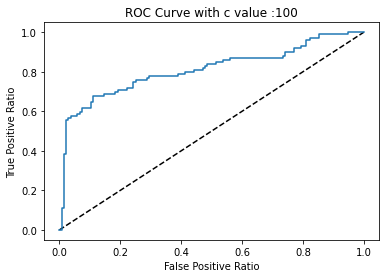

AUC value :  0.8092691622103387


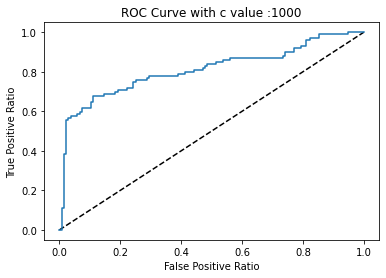

AUC value :  0.8092691622103387
Softmax:
 --------------- 
 Train Confusion Matrix : 
 [[249  39]
 [ 49 140]] 
 Test Confusion Matrix : 
 [[116  20]
 [ 29  70]] 

Softmax : 
 ----------------------------
Accuracy value by the model   : 0.77
Calculated accuracy value     : 0.77
accuracy_score() value        : 0.77 

Calculated precision value   : 0.74
precision_score() value      : 0.74

Calculated recall value   : 0.69
recall_score() value      : 0.69

Calculated specificity value   : 0.82

Calculated F1 score  : 0.71
f1_score() value     : 0.71 

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       136
           1       0.74      0.69      0.71        99

    accuracy                           0.77       235
   macro avg       0.76      0.76      0.76       235
weighted avg       0.76      0.77      0.76       235

f1_score() value        : 0.71
recall_score() value    : 0.69
precision_score() value : 0.74


Precision  : [0.78321678

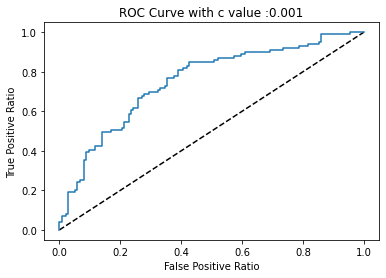

AUC value :  0.7506684491978609


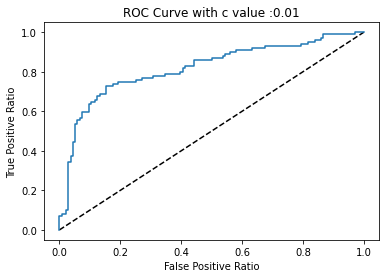

AUC value :  0.8163992869875223


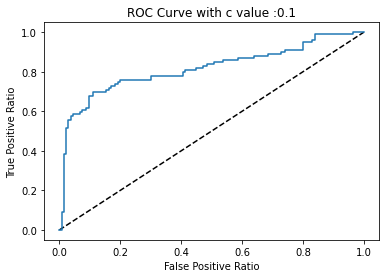

AUC value :  0.8155080213903743


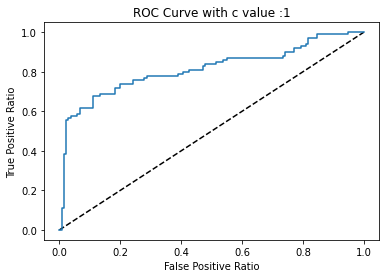

AUC value :  0.811423054070113


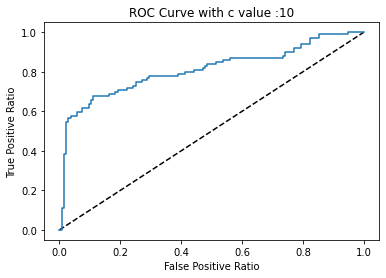

AUC value :  0.8088235294117647


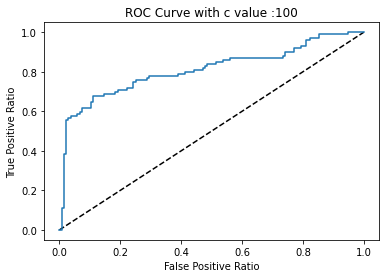

AUC value :  0.8092691622103387


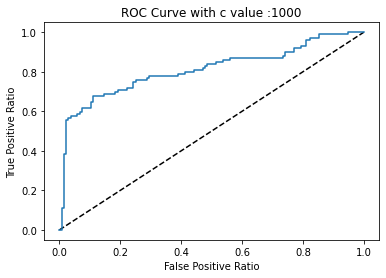

AUC value :  0.8092691622103387


In [78]:
# Model One vs Rest , 
metrics(model_one,X_test,X_train,y_train,y_test,train_one_pred,test_one_pred, "One vs Rest")

# Model Softmax
metrics(model_softmax,X_test,X_train,y_train,y_test,train_softmax_pred,test_softmax_pred, "Softmax")